# 03. MVPs
A number of simple models to test initial assumptions

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [4]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [5]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,0,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,0,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,0,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,0,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,0,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [6]:
X = combined_data[all_stats_columns]
y = combined_data[predict_columns]

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MVP: Ordinary Least Squares

In [7]:
from sklearn.linear_model import ElasticNet

# Initialize the model
eln = ElasticNet(random_state=42)

# Fit the model
eln.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {eln.score(X_train, y_train)}')
print(f'R^2 (test): {eln.score(X_test, y_test)}')

R^2 (train): 0.019884116667173417
R^2 (test): 0.014564521128109529


## MVP: Partial Least Squares

In [8]:
from sklearn.cross_decomposition import PLSRegression

# Initialize the model
pls = PLSRegression()

# Fit the model
pls.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {pls.score(X_train, y_train)}')
print(f'R^2 (test): {pls.score(X_test, y_test)}')

R^2 (train): 0.2597108582512673
R^2 (test): 0.26583996352692524


## MVP: Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
rfr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rfr.score(X_train, y_train)}')
print(f'R^2 (test): {rfr.score(X_test, y_test)}')

R^2 (train): 0.3872972969326605
R^2 (test): 0.3241763244983862


## MVP: Extra Trees

In [10]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the model
etr = ExtraTreesRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
etr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {etr.score(X_train, y_train)}')
print(f'R^2 (test): {etr.score(X_test, y_test)}')

R^2 (train): 0.3670806134741569
R^2 (test): 0.32024312313041137


## MVP: MultiOutputRegressor with AdaBoost

In [11]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
mor = MultiOutputRegressor(estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mor.score(X_train, y_train)}')
print(f'R^2 (test): {mor.score(X_test, y_test)}')

R^2 (train): 0.4037942269583372
R^2 (test): 0.3057751037832816


## MVP: RegressorChain with AdaBoost

In [12]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
rch = RegressorChain(base_estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rch.score(X_train, y_train)}')
print(f'R^2 (test): {rch.score(X_test, y_test)}')

R^2 (train): 0.32216127341058115
R^2 (test): 0.27791901765062765


## MVP: simple NN

In [13]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp = MLPRegressor(hidden_layer_sizes=(25,50,25,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mlp.score(X_train, y_train)}')
print(f'R^2 (test): {mlp.score(X_test, y_test)}')

R^2 (train): 0.29581963187701665
R^2 (test): 0.28175369445085185


## Playground

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *
import warnings

warnings.filterwarnings(action='ignore')

In [15]:
def smith_waterman(s1, s2, match_score=2, gap_cost=1):
    """
    Compute the Smith-Waterman score between two strings.
    
    :param s1: First string.
    :param s2: Second string.
    :param match_score: Score for character match.
    :param gap_cost: Cost for gap (insertion/deletion).
    :return: The Smith-Waterman score for the best local alignment.
    """
    m, n = len(s1), len(s2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if s1[i - 1] == s2[j - 1] else -match_score)
            delete = score_matrix[i - 1][j] - gap_cost
            insert = score_matrix[i][j - 1] - gap_cost
            score_matrix[i][j] = max(0, match, delete, insert)
            max_score = max(max_score, score_matrix[i][j])

    return max_score

def find_most_similar_strings(target, strings, n=5):
    """
    Find the n most similar strings to the target string from a list of strings using Smith-Waterman score.
    
    :param target: The target string to compare against.
    :param strings: A list of strings to search within.
    :param n: The number of most similar strings to return. Default is 5.
    :return: A list of the n most similar strings.
    """
    # Compute the Smith-Waterman score for each string in the list
    scores = [(string, smith_waterman(target, string)) for string in strings]
    
    # Find the n strings with the highest scores
    most_similar = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    
    # Extract and return only the strings (not the scores)
    return [string for string, score in most_similar]

In [23]:
find_most_similar_strings('Rodri', X.index, n=10)

['Rodrigo Ely',
 'Rodrigo De Paul',
 'Rodrigo Riquelme',
 'Rodrigo',
 'Rodrigo Battaglia',
 'Rodri',
 'Rodrigo Zalazar',
 'Rodrigo Bentancur',
 'Rodrigo Becão',
 'Guido Rodríguez']

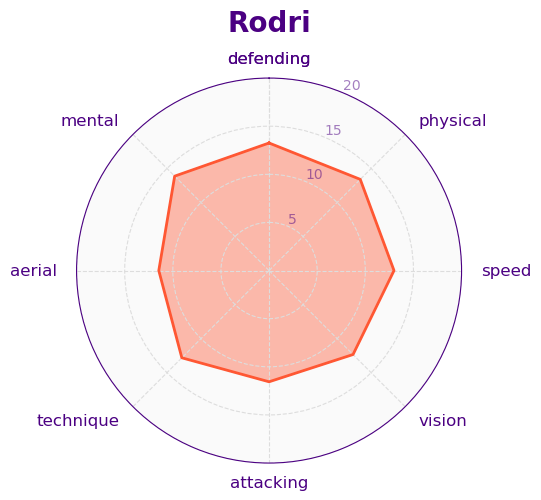

In [25]:
test_name = 'Rodri'

model = etr

predictions = model.predict(X.loc[[test_name]].values)

test = pd.Series(predictions[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

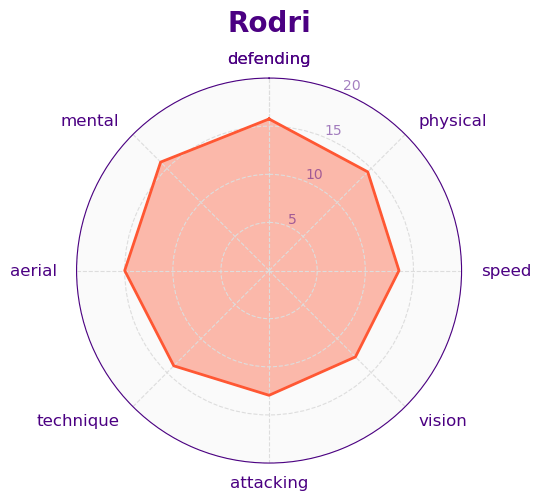

In [26]:
real = y.loc[[test_name]].values

test = pd.Series(real[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

In [27]:
pd.DataFrame({'prediction':predictions[0],
              'real':real[0]},
              index=predict_columns)

,prediction,real
Corners,8.497640,7
Crossing,10.651842,8
Dribbling,11.773497,13
Finishing,8.868264,9
First Touch,13.297177,15
Free Kick Taking,8.688413,8
Heading,11.150465,13
Long Shots,10.559859,14
Long Throws,8.488393,8
Marking,12.147098,12


In [28]:
print(f'Prediction mean : {predictions[0].mean()}')
print(f'Real mean : {real[0].mean()}')

Prediction mean : 12.372582838850647
Real mean : 13.472222222222221


In [29]:
X_test.index

Index(['Ross Barkley', 'Edin Džeko', 'Alexandre Lacazette', 'Patrick Ciurria',
       'Mateo Kovačić', 'Alex Král', 'Youssouf Sabaly', 'Jean-Philippe Mateta',
       'Manuel Locatelli', 'Amin Sarr',
       ...
       'Sergio Escudero', 'Víctor Chust', 'Georginio Wijnaldum',
       'Carlos Gruezo', 'Daniele Verde', 'Christopher Nkunku', 'Ferland Mendy',
       'Julian Ryerson', 'Mattia Caldara', 'Tetê'],
      dtype='object', name='Name', length=303)